# Milestone 2 Phase 2
# Real and Fake News Classification
___
___
Nama    : Ali Aufa Fakhri

Batch   : 019

Dataset : https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset

Deployment: https://huggingface.co/spaces/aliaufa/Fake-News-Detection

---
---

# 1. Introduction

## Background

In today's digital age, the widespread distribution of information has brought both opportunities and challenges. The rise of social media platforms and online news sources has made it easier for individuals to access news and share information. However, this accessibility has also led to the rapid increase of fake news, which can have significant consequences for individuals, societies, and even democratic processes. Fake news refers to intentionally misleading or fabricated information presented as factual news. Detecting and combating fake news has become a critical task to ensure the integrity of news distribution and promote informed decision-making.

## Problem Statement
As an AI researcher working for Chirper, a prominent social media platform, the prevalence of fake news poses a significant challenge to our platform's integrity and user experience. The spread of misinformation can undermine user trust, erode the credibility of content, and potentially harm the social discourse among our users. Detecting and mitigating the impact of fake news is crucial to ensuring an accurate and reliable information ecosystem on Chirper. Therefore, our problem statement is to develop an effective and efficient fake news detection model that can identify and flag misleading or false information shared on our platform. By addressing this challenge, we aim to safeguard user trust, promote informed discussions, and enhance the overall user experience on Chirper.

The primary objective of the model is to capture as many instances of fake news as possible, aiming to prevent their spreading before undergoing fact-checking. This requires minimizing the number of fake news articles incorrectly predicted as real. To evaluate the model's performance in achieving this objective, we will prioritize the use of the recall metric. Recall, also referred to as sensitivity or the true positive rate, measures the proportion of correctly classified fake news articles out of all actual fake news instances. By emphasizing high recall, we ensure that the model effectively captures and detects fake news, thereby reducing the chances of false negatives and effectively countering the spread of misinformation.

## Dataset
The dataset we have comprises approximately 40,000 articles that is divided into two separate sets, one containing around 20,000 articles of fake news and the other containing around 20,000 articles of real news.

Description of columns in the dataset:

- title: contains news headlines
- text: contains news content/article
- subject: type of news
- date: date the news was published

---

# 2. Import Library

Library used in this assignment

In [1]:
# import library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# NLP visualization
from wordcloud import WordCloud,STOPWORDS
from nltk import ngrams
from collections import Counter

# NLP
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

# pre-process
from sklearn.model_selection import train_test_split
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from gensim.models import Word2Vec
from nltk.probability import FreqDist

# Tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Bidirectional, LSTM, GRU, TextVectorization, Embedding
from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras import Model

# classification evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from collections import Counter


import pickle
import json
warnings.filterwarnings('ignore')

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

---

# 3. Data Loading


In [3]:
# input dataframe
true = pd.read_csv('True.csv')
fake = pd.read_csv('Fake.csv')

## Data shape overview

In [4]:
# show first 10 rows of true news dataset
true.head(10)

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   
5  White House, Congress prepare for talks on spe...   
6  Trump says Russia probe will be fair, but time...   
7  Factbox: Trump on Twitter (Dec 29) - Approval ...   
8         Trump on Twitter (Dec 28) - Global Warming   
9  Alabama official to certify Senator-elect Jone...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
5  WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...  politicsNews   
6  WEST PALM BEACH, Fla (Reuters) - President Don...  politicsNews   
7  The following statements were posted to the ve...  politicsNews   
8  The following statements were posted to the ve...  politicsNews   
9  WASHINGTON (Reuters) - Alabama Secretary of St...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   
5  December 29, 2017   
6  December 29, 2017   
7  December 29, 2017   
8  December 29, 2017   
9  December 28, 2017

In [5]:
# show first 10 rows of fake news dataset
fake.head(10)

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   
5   Racist Alabama Cops Brutalize Black Boy While...   
6   Fresh Off The Golf Course, Trump Lashes Out A...   
7   Trump Said Some INSANELY Racist Stuff Inside ...   
8   Former CIA Director Slams Trump Over UN Bully...   
9   WATCH: Brand-New Pro-Trump Ad Features So Muc...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   
5  The number of cases of cops brutalizing and ki...    News   
6  Donald Trump spent a good portion of his day a...    News   
7  In the wake of yet another court decision that...    News   
8  Many people have raised the alarm regarding th...    News   
9  Just when you might have thought we d get a br...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  
5  December 25, 2017  
6  December 23, 2017  
7  December 23, 2017  
8  December 22, 2017  
9  December 21, 2017

True and Fake dataset already has the same columns. We can merge them but first we need to give category label to each.

In [6]:
# give categorization label to real and fake news
true['fake_news'] = 0
fake['fake_news'] = 1

In [7]:
# merge the 2 datasets
df = pd.concat([true,fake])

In [8]:
df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  fake_news  
0  December 31, 2017           0  
1  December 29, 2017           0  
2  December 31, 2017           0  
3  December 30, 2017           0  
4  December 29, 2017           0

In [9]:
df.tail()

title  \
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject  \
23476  21st Century Wire says As 21WIRE reported earl...  Middle-east   
23477  21st Century Wire says It s a familiar theme. ...  Middle-east   
23478  Patrick Henningsen  21st Century WireRemember ...  Middle-east   
23479  21st Century Wire says Al Jazeera America will...  Middle-east   
23480  21st Century Wire says As 21WIRE predicted in ...  Middle-east   

                   date  fake_news  
23476  January 16, 2016          1  
23477  January 16, 2016          1  
23478  January 15, 2016          1  
23479  January 14, 2016          1  
23480  January 12, 2016          1

In [10]:
# show shape of data
df.shape

(44898, 5)

the data consist of 37010 rows and 22 columns.

## Check the data type

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      44898 non-null  object
 1   text       44898 non-null  object
 2   subject    44898 non-null  object
 3   date       44898 non-null  object
 4   fake_news  44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


## Check Duplicates

In [12]:
# Check how many unique values on each column
df.nunique()

title        38729
text         38646
subject          8
date          2397
fake_news        2
dtype: int64

There are 44898 data entries but only 38729 unique entries for title and 38646 for text. This indicates duplicates on our dataset.

In [13]:
# check sum of duplicates
df.duplicated().sum()

209

There are 209 data that has duplicates. Duplicates meaning the data has the exact same title, text, subject, date, and category. We will check how many rows are duplicates

In [14]:
duplicate_rows = df[df.duplicated(keep=False)]
duplicate_rows

title  \
416    Senate tax bill stalls on deficit-focused 'tri...   
445    Senate tax bill stalls on deficit-focused 'tri...   
762    Trump warns 'rogue regime' North Korea of grav...   
778    Trump warns 'rogue regime' North Korea of grav...   
850    Republicans unveil tax cut bill, but the hard ...   
...                                                  ...   
9942   HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...   
11445  FORMER DEMOCRAT WARNS Young Americans: “Rioter...   
11446  FORMER DEMOCRAT WARNS Young Americans: “Rioter...   
14924  [VIDEO] #BlackLivesMatter Terrorists Storm Dar...   
14925  [VIDEO] #BlackLivesMatter Terrorists Storm Dar...   

                                                    text       subject  \
416    WASHINGTON (Reuters) - The U.S. Senate on Thur...  politicsNews   
445    WASHINGTON (Reuters) - The U.S. Senate on Thur...  politicsNews   
762    BEIJING (Reuters) - U.S. President Donald Trum...  politicsNews   
778    BEIJING (Reuters) - U.S. President Donald Trum...  politicsNews   
850    WASHINGTON (Reuters) - U.S. House of Represent...  politicsNews   
...                                                  ...           ...   
9942   No time to waste   we've got to fight with eve...      politics   
11445   Who is silencing political speech, physically...      politics   
11446   Who is silencing political speech, physically...      politics   
14924  They were probably just looking for a  safe sp...      politics   
14925  They were probably just looking for a  safe sp...      politics   

                     date  fake_news  
416    November 30, 2017           0  
445    November 30, 2017           0  
762     November 8, 2017           0  
778     November 8, 2017           0  
850     November 2, 2017           0  
...                   ...        ...  
9942          Sep 9, 2017          1  
11445        Mar 10, 2017          1  
11446        Mar 10, 2017          1  
14924        Nov 16, 2015          1  
14925        Nov 16, 2015          1  

[405 rows x 5 columns]

There are 405 rows that are duplicates, but there is still a lot of duplicates in text column. We will check and remove duplicates in text column since text is the exact same text indicates the exact same news.

In [15]:
duplicate_text = df[df.duplicated(subset='text', keep=False)]
duplicate_text

title  \
165           What is in the Republicans' final tax bill   
166    Factbox: What is in the U.S. Republicans' fina...   
247    Aide tries to refocus tax debate after Trump's...   
250    Aide tries to refocus U.S. tax debate after Tr...   
416    Senate tax bill stalls on deficit-focused 'tri...   
...                                                  ...   
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text       subject  \
165    (Reuters) - Republicans in the U.S. Congress r...  politicsNews   
166    (Reuters) - Republicans in the U.S. Congress r...  politicsNews   
247    WASHINGTON (Reuters) - President Donald Trump’...  politicsNews   
250    WASHINGTON (Reuters) - President Donald Trump’...  politicsNews   
416    WASHINGTON (Reuters) - The U.S. Senate on Thur...  politicsNews   
...                                                  ...           ...   
23476  21st Century Wire says As 21WIRE reported earl...   Middle-east   
23477  21st Century Wire says It s a familiar theme. ...   Middle-east   
23478  Patrick Henningsen  21st Century WireRemember ...   Middle-east   
23479  21st Century Wire says Al Jazeera America will...   Middle-east   
23480  21st Century Wire says As 21WIRE predicted in ...   Middle-east   

                     date  fake_news  
165    December 14, 2017           0  
166    December 14, 2017           0  
247     December 8, 2017           0  
250     December 7, 2017           0  
416    November 30, 2017           0  
...                   ...        ...  
23476    January 16, 2016          1  
23477    January 16, 2016          1  
23478    January 15, 2016          1  
23479    January 14, 2016          1  
23480    January 12, 2016          1  

[11392 rows x 5 columns]

there are 11392 rows with same text. We will remove them and only keep one from each

In [16]:
# drop text duplicates
df.drop_duplicates(subset='text', keep='first', inplace=True)

In [17]:
# check sum of duplicates
df.duplicated().sum()

0

we have removed the duplicates

## Check missing value

In [18]:
# cek missing value
df.isna().sum()

title        0
text         0
subject      0
date         0
fake_news    0
dtype: int64

No missing values

---

# 4. Exploratory Data Analysis


In [19]:
# create copy of dataframe
data = df.copy()

## Target Ratio
See if there is any imbalance from the target data

In [20]:
# query category count
label_count = data['fake_news'].value_counts()
label_count

0    21192
1    17454
Name: fake_news, dtype: int64

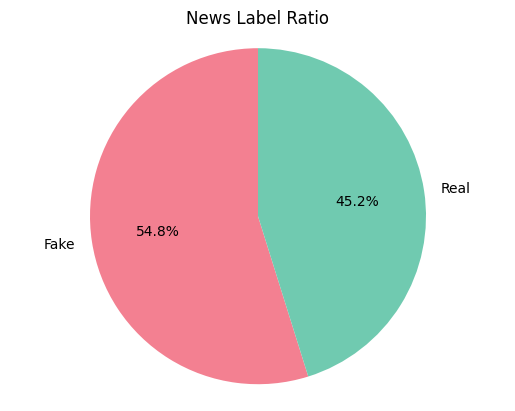

In [21]:
# Plotting pie chart
plt.pie(label_count, 
        labels=['Fake', 'Real'], startangle=90,
        colors=['#F38091','#70CAb0'],
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('News Label Ratio')

plt.show()

The data seems balanced between Fake and Real news with 54.8% of the data are fake news.

## Subject Count

In [22]:
data['subject'].value_counts()

politicsNews       11214
worldnews           9978
News                9050
politics            6424
US_News              783
left-news            683
Government News      514
Name: subject, dtype: int64

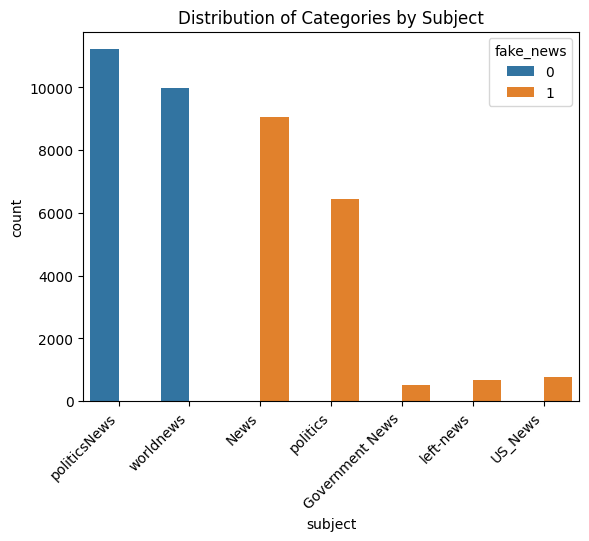

In [23]:
# Countplot
ax = sns.countplot(x='subject', hue='fake_news', data=df)
plt.title('Distribution of Categories by Subject')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()

It seems that fake news and real news data has different subject categories. On real news there are more politics than world news, and on fake news there are more subjects labeled 'News' than 'politics'.

Since the subjects label are different on real and fake news, we will drop this column as it might influence accuracy of our prediction model.


## Number of Sentences and Words

In [24]:
data['sentence_count'] = data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
data['word_count'] = data['text'].apply(lambda x: len(nltk.word_tokenize(x)))

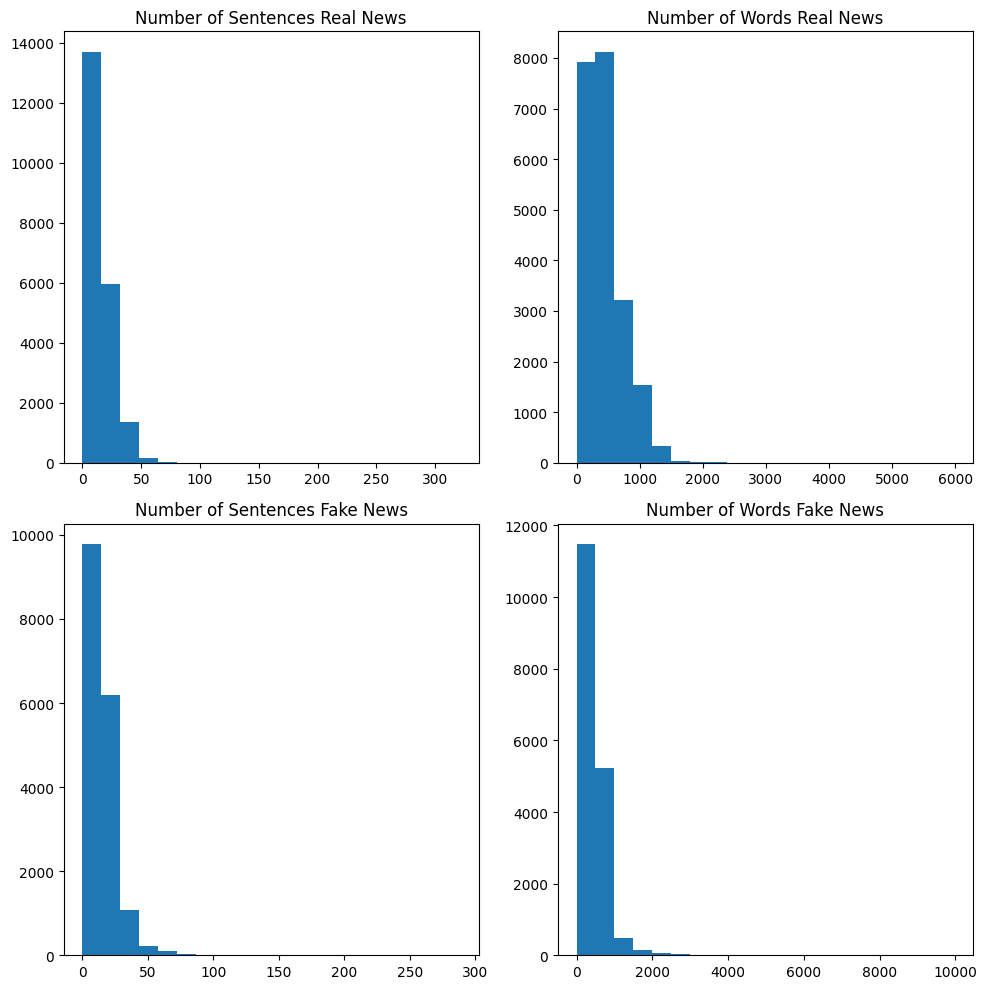

In [25]:
# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Plot the number of sentences Real News
axs[0, 0].hist(data[data['fake_news'] == 0]['sentence_count'], bins=20)
axs[0, 0].set_title('Number of Sentences Real News')

# Plot the number of words for Real News
axs[0, 1].hist(data[data['fake_news'] == 0]['word_count'], bins=20)
axs[0, 1].set_title('Number of Words Real News')

# Plot the number of sentences for Fake News
axs[1, 0].hist(data[data['fake_news'] == 1]['sentence_count'], bins=20)
axs[1, 0].set_title('Number of Sentences Fake News')

# Plot the number of words for Fake News
axs[1, 1].hist(data[data['fake_news'] == 1]['word_count'], bins=20)
axs[1, 1].set_title('Number of Words Fake News')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [26]:
# Print Max and Average sentence on real news
print('Max sentence on True news ', data[data['fake_news'] == 0]['sentence_count'].max())
print('Mean sentence on True news ', data[data['fake_news'] == 0]['sentence_count'].mean())
# Print Max and Average word on real news
print('Max word on True news ', data[data['fake_news'] == 0]['word_count'].max())
print('Mean word on True news ', data[data['fake_news'] == 0]['word_count'].mean())

Max sentence on True news  321
Mean sentence on True news  14.783314458286146
Max word on True news  5979
Mean word on True news  434.4073235183088


In [27]:
# Print Max and Average sentence on Fake news
print('Max sentence on Fake news ', data[data['fake_news'] == 1]['sentence_count'].max())
print('Mean sentence on Fake news ', data[data['fake_news'] == 1]['sentence_count'].mean())
# Print Max and Average word on fake news
print('Max word on True news ', data[data['fake_news'] == 1]['word_count'].max())
print('Mean word on True news ', data[data['fake_news'] == 1]['word_count'].mean())

Max sentence on Fake news  288
Mean sentence on Fake news  15.390340323135097
Max word on True news  9958
Mean word on True news  473.34393262289444


It seems that fake news tends to have a higher average number of words but a lower average number of sentences compared to real news. This observation could suggest that fake news articles may be more focused on presenting information in shorter sentences, potentially using more sensational or attention-grabbing language.

The visualization we can do in this part are limited because the text still has a lot of noise. We will do further exploration on the next part after text data has been preprocessed.

---

# 5. Data Preprocessing

## Drop non-needed features

Some features we considers not needed for the models are:
- `subject` : subjects label are different on real and fake news
- `date` : we will not use date feature as it has no relation to determining fake news.
- `title` : we will combine `title` and `text` as one `text` column.

In [28]:
# combining title and text
data["text"] = data["title"] + " " + data["text"]

In [29]:
# drop non-needed column
data.drop(['subject', 'date', 'title'], axis=1, inplace=True)

## Show Text Before Preprocessing

In [30]:
# option to show full content of column
pd.set_option('display.max_colwidth', None)

In [31]:
# Check initial text before cleaning
data.head(1)

text  \
0  As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support education, scientific research, infrastructure, public health and environmental protection. “The (Trump) administration has already been willing to say: ‘We’re going to increase non-defense discretionary spending ... by about 7 percent,’” Meadows, chairman of the small but influential House Freedom Caucus, said on the program. “Now, Democrats are saying that’s not enough, we need to give the government a pay raise of 10 to 11 percent. For a fiscal conservative, I don’t see where the rationale is. ... Eventually you run out of other people’s money,” he said. Meadows was among Republicans who voted in late December for their party’s debt-financed tax overhaul, which is expected to balloon the federal budget deficit and add about $1.5 trillion over 10 years to the $20 trillion national debt. “It’s interesting to hear Mark talk about fiscal responsibility,” Democratic U.S. Representative Joseph Crowley said on CBS. Crowley said the Republican tax bill would require the  United States to borrow $1.5 trillion, to be paid off by future generations, to finance tax cuts for corporations and the rich. “This is one of the least ... fiscally responsible bills we’ve ever seen passed in the history of the House of Representatives. I think we’re going to be paying for this for many, many years to come,” Crowley said. Republicans insist the tax package, the biggest U.S. tax overhaul in more than 30 years,  will boost the economy and job growth. House Speaker Paul Ryan, who also supported the tax bill, recently went further than Meadows, making clear in a radio interview that welfare or “entitlement reform,” as the party often calls it, would be a top Republican priority in 2018. In Republican parlance, “entitlement” programs mean food stamps, housing assistance, Medicare and Medicaid health insurance for the elderly, poor and disabled, as well as other programs created by Washington to assist the needy. Democrats seized on Ryan’s early December remarks, saying they showed Republicans would try to pay for their tax overhaul by seeking spending cuts for social programs. But the goals of House Republicans may have to take a back seat to the Senate, where the votes of some Democrats will be needed to approve a budget and prevent a government shutdown. Democrats will use their leverage in the Senate, which Republicans narrowly control, to defend both discretionary non-defense programs and social spending, while tackling the issue of the “Dreamers,” people brought illegally to the country as children. Trump in September put a March 2018 expiration date on the Deferred Action for Childhood Arrivals, or DACA, program, which protects the young immigrants from deportation and provides them with work permits. The president has said in recent Twitter messages he wants funding for his proposed Mexican border wall and other immigration law changes in exchange for agreeing to help the Dreamers. Representative

In [32]:
data.tail(1)

text  \
22702  A Troubled King: Chicago’s Rahm Emanuel Desperate to Save His 2020 Presidential Run 21st Century Wire says It s not that far away. Guess who wants to run for president in 2020?Just before the New Year bell rung, the embattled Chicago Mayor Rahm Israel Emanuel (D) was forced to cut short his family vacation in Cuba, and headed back to the windy city after yet another embarrassing police shooting last week which claimed two lives as police responding to a  domestic disturbance  call killed  19-year-old Quintonio LeGrier, an engineering student at Northern Illinois University, and bystander 55-year-old Betti Jones, a grandmother.Last week, 100 people, family and activists, held a vigil for the victims. The Mayor has attempted a sort of mea culpa this time, but the public is not buying it, mainly because this was the second major high-profile police shooting incident to rock city hall in the last month. TROUBLE IN HIS KEEP: The LaQuan McDonald shooting has rattled the  dynasty potential  of Chicago s Rahm Emanuel.Currently serving his second term in office, the 56-year-old mayor is going from one crisis to the next, as tensions continue to simmer after the initial controversy, the killing of 17-year-old Laquan McDonald who was shot 16 times by city police on camera   which prompted angry mobs demanding  The King  step down.There could be a political price to pay for all of this. Not only are #BlackLivesMatter on the rampage over these latest shooting events, but also LeGrier s mother, Janet Cooksey, appeared on national TV last Sunday at a news conference, wearing a T-shirt emblazoned with the face of Mayor Emanuel with the words  Rahm Failed Us. Throughout the debacle, Emmanuel has not given in to the public pressure, even though his approval rating has plummeted 20% since hostilities began. On top of this, Chicago has earned the reputation of  murder capital of America , despite the mayor s staunch liberal policy of  gun-free zones  across the city which some critics credit towards creating a criminal s paradise. The Mayor is already on shaky ground. Only last winter, Emanuel narrowly survived a close run-off election to keep his job in office.All of this has the potential to cast a shadow over Emanuel s political future, which is likely to include a Democratic Party presidential run in 2020. It s reported that Emanuel already has a substantial campaign war chest ready to go, billions of dollars in fact, thanks to some very wealthy backers. If Emanuel does go ahead with the 2020 plan, the driving force behind his campaign will be his Hollywood mogul brother, Ari Emanuel, who will spare no expense in terms of PR, marketing and advertising for his brother s political drive to the White House. Part of the newly found Emanuel family fortune derives from their early investment in the virtual taxi service sensation, Uber, with the Emanuel investment estimated to be valued over $1 billion alone. This is not without controversy however, as it was Mayor Rahm Emanuel s deregulation of Chicago s taxi industry that helped Uber shares to skyrocket in value. Critics are saying that there was a conflict of interest there, but in today s seedy political environment of insider trading and open criminality, it might be hard for any politician to pull rank over that issue. Add to this the potential hundreds of millions more in donations that Emanuel will receive from Jewish property tycoon Sheldon Adelson, and also from Jewish billionaire and Emanuel s fellow anti-gun advocate, Michael Bloomberg   and all in the interests of serving Israel, and you can see how Emanuel could be viewed as a 2020 Democratic front-runner already.The Mayor emerged on to the DC sewer scene as part of the Clinton-Obama Chicago political machine. He s been described by AFP s Victor Thorn as,  More sinister than Karl Rove and potentially deadlier than Dick  Darth Vader  Cheney . Back when Emanuel was Barack Obama s chief of staff in 2008, many commentators r

## Cleaning Text
Text cleaning is essential for preparing text data for analysis, modeling, and extracting meaningful insights. It helps to remove noise, standardize the data, and focus on the relevant content, leading to better results and more accurate interpretations.

In [33]:
# build text cleaning function
def clean_text(x):
    '''
    Clean the text data by applying various operations to input text.
    Parameters:
        text (str): The input text to be cleaned.
    Returns:
        str: The cleaned text.
        '''
    # Convert the input text to lowercase
    text = x
    text = text.lower()

    # Remove square brackets and any content within them
    text = re.sub('\[.*?\]', '', text)

    # Remove punctuation marks from the text
    text = re.sub(r'[^\w\s]', '', text)

    # Remove words that contain numbers
    text = re.sub('\w*\d\w*', '', text)

    # Remove any URLs present in the text
    text = re.sub(r'http\S+', '', text)

    # Return the cleaned text
    return text

## Remove Stopwords
Stopwords are common words in a language that add little meaning to text, such as "the" and "and." Removing stopwords during text preprocessing reduces noise, improves analysis accuracy, simplifies the language, and reduces dimensionality. It helps focus on important words and enhances the efficiency of natural language processing tasks.

In [34]:
def remove_stopwords(text):
    '''
    Function to remove stopwords from text using NLTK library.
    Parameters:
        text (str): The input text to be cleaned.
    Returns:
        str: The cleaned text with stopwords removed.
    '''
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    cleaned_text = ' '.join(filtered_tokens)
    return cleaned_text

## Lemmatization
Lemmatization is a linguistic process that involves reducing words to their base or dictionary form, known as the lemma. The goal of lemmatization is to normalize different inflected forms of a word so that they can be treated as a single unit. For example, lemmatizing the words "running," "ran," and "runs" would result in the lemma "run."

Lemmatization is important in text preprocessing because it reduces the complexity and variability of words, making it easier to analyze and understand text. By converting different word forms to their base form, lemmatization helps to consolidate related words and capture their common meaning. This can improve the accuracy of text analysis

In [35]:
def lemmatize_text(text):
    '''
    Function to lemmatize text using NLTK library.
    Parameters:
        text (str): The input text to be lemmatized.
    Returns:
        str: The lemmatized text.
    '''
    lemmatizer = WordNetLemmatizer()
    tokens = nltk.word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text

## Combined Preprocess Function
We combine text cleaning, stopwords removal and lemmatization to one function and use it to transform text column.

In [36]:
def preprocess_text(text):
    '''
    Function to preprocess text by cleaning, removing stopwords, and lemmatizing.

    Parameters:
        text (str): The input text to be preprocessed.

    Returns:
        str: The preprocessed text.
    '''
    text = clean_text(text)
    text = remove_stopwords(text)
    text = lemmatize_text(text)
    return text

In [37]:
#Apply function on text column
data['text']=data['text'].apply(preprocess_text)

In [38]:
data.head(1)

text  \
0  u budget fight loom republican flip fiscal script washington reuters head conservative republican faction u congress voted month huge expansion national debt pay tax cut called fiscal conservative sunday urged budget restraint keeping sharp pivot way among republican u representative mark meadow speaking cbs face nation drew hard line federal spending lawmaker bracing battle january return holiday wednesday lawmaker begin trying pas federal budget fight likely linked issue immigration policy even november congressional election campaign approach republican seek keep control congress president donald trump republican want big budget increase military spending democrat also want proportional increase nondefense discretionary spending program support education scientific research infrastructure public health environmental protection trump administration already willing say going increase nondefense discretionary spending percent meadow chairman small influential house freedom caucus said program democrat saying thats enough need give government pay raise percent fiscal conservative dont see rationale eventually run people money said meadow among republican voted late december party debtfinanced tax overhaul expected balloon federal budget deficit add trillion year trillion national debt interesting hear mark talk fiscal responsibility democratic u representative joseph crowley said cbs crowley said republican tax bill would require united state borrow trillion paid future generation finance tax cut corporation rich one least fiscally responsible bill weve ever seen passed history house representative think going paying many many year come crowley said republican insist tax package biggest u tax overhaul year boost economy job growth house speaker paul ryan also supported tax bill recently went meadow making clear radio interview welfare entitlement reform party often call would top republican priority republican parlance entitlement program mean food stamp housing assistance medicare medicaid health insurance elderly poor disabled well program created washington assist needy democrat seized ryans early december remark saying showed republican would try pay tax overhaul seeking spending cut social program goal house republican may take back seat senate vote democrat needed approve budget prevent government shutdown democrat use leverage senate republican narrowly control defend discretionary nondefense program social spending tackling issue dreamer people brought illegally country child trump september put march expiration date deferred action childhood arrival daca program protects young immigrant deportation provides work permit president said recent twitter message want funding proposed mexican border wall immigration law change exchange agreeing help dreamer representative debbie dingell told cbs favor linking issue policy objective wall funding need daca clean said wednesday trump aide meet congressional leader discus issue followed weekend strategy session trump republican leader jan white house said trump also scheduled meet sunday florida republican governor rick scott want emergency aid house passed billion aid package hurricane florida texas puerto rico wildfire california package far exceeded billion requested trump administration senate yet voted aid   

   fake_news  sentence_count  word_count  
0          0              30         885

## Preprocessed Data Visualization

### Wordcloud

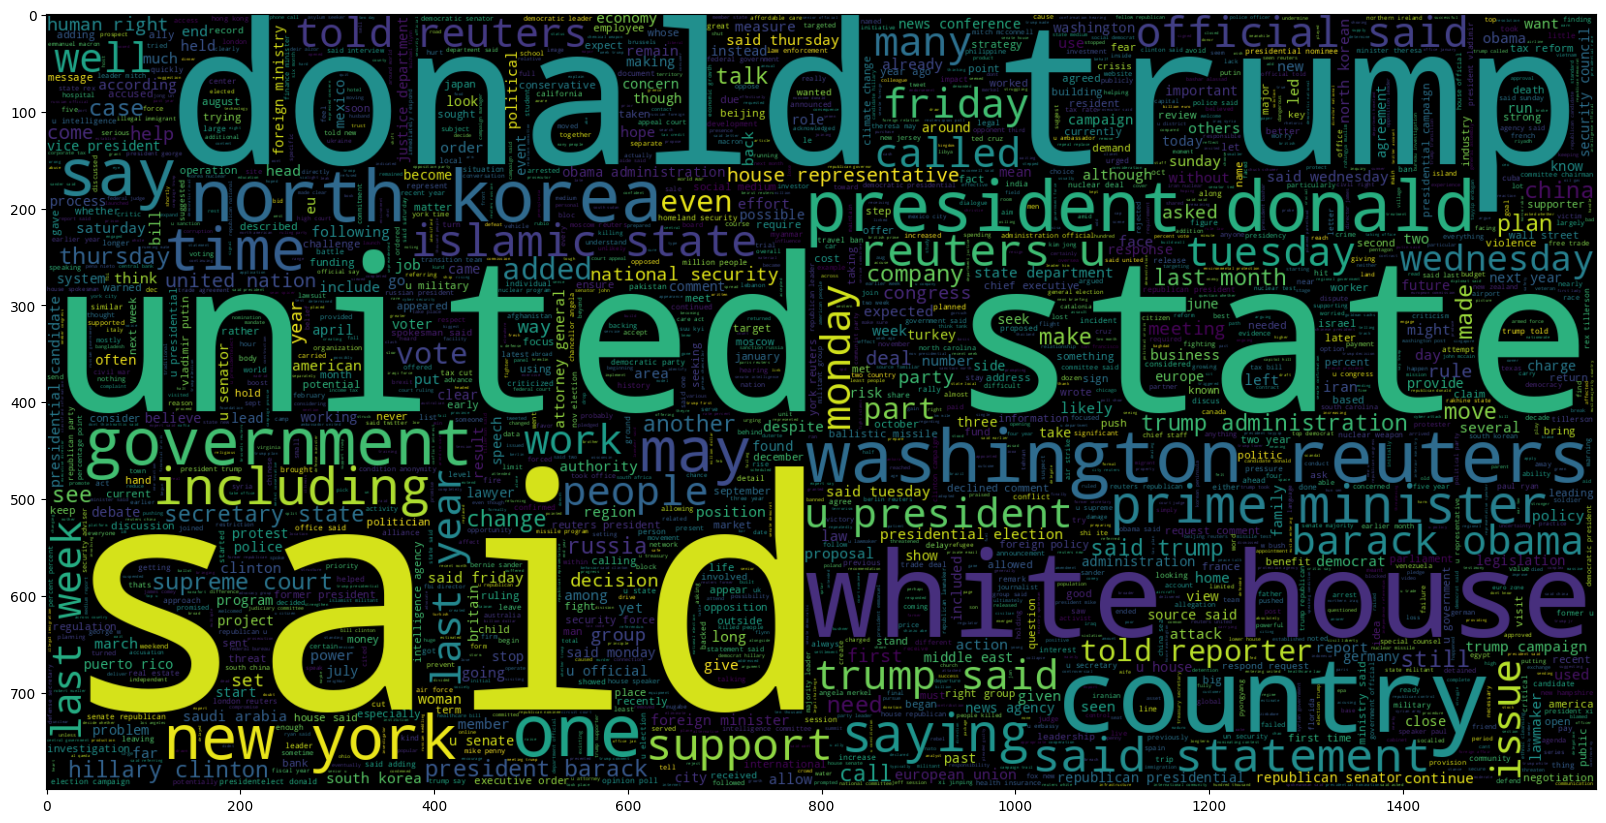

In [39]:
#plot wordcloud for real news
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.fake_news == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

We see that the most frequent words are presidential themed. This makes sense because the news data range from january 2016 to december 2017 right after Donald Trump elected president of the US. We can also see reuters among the wordcloud. Reuters is a legit news agency, so we might not see reuters among fake news wordcloud. This can be one of the determining factors in predicting real news.

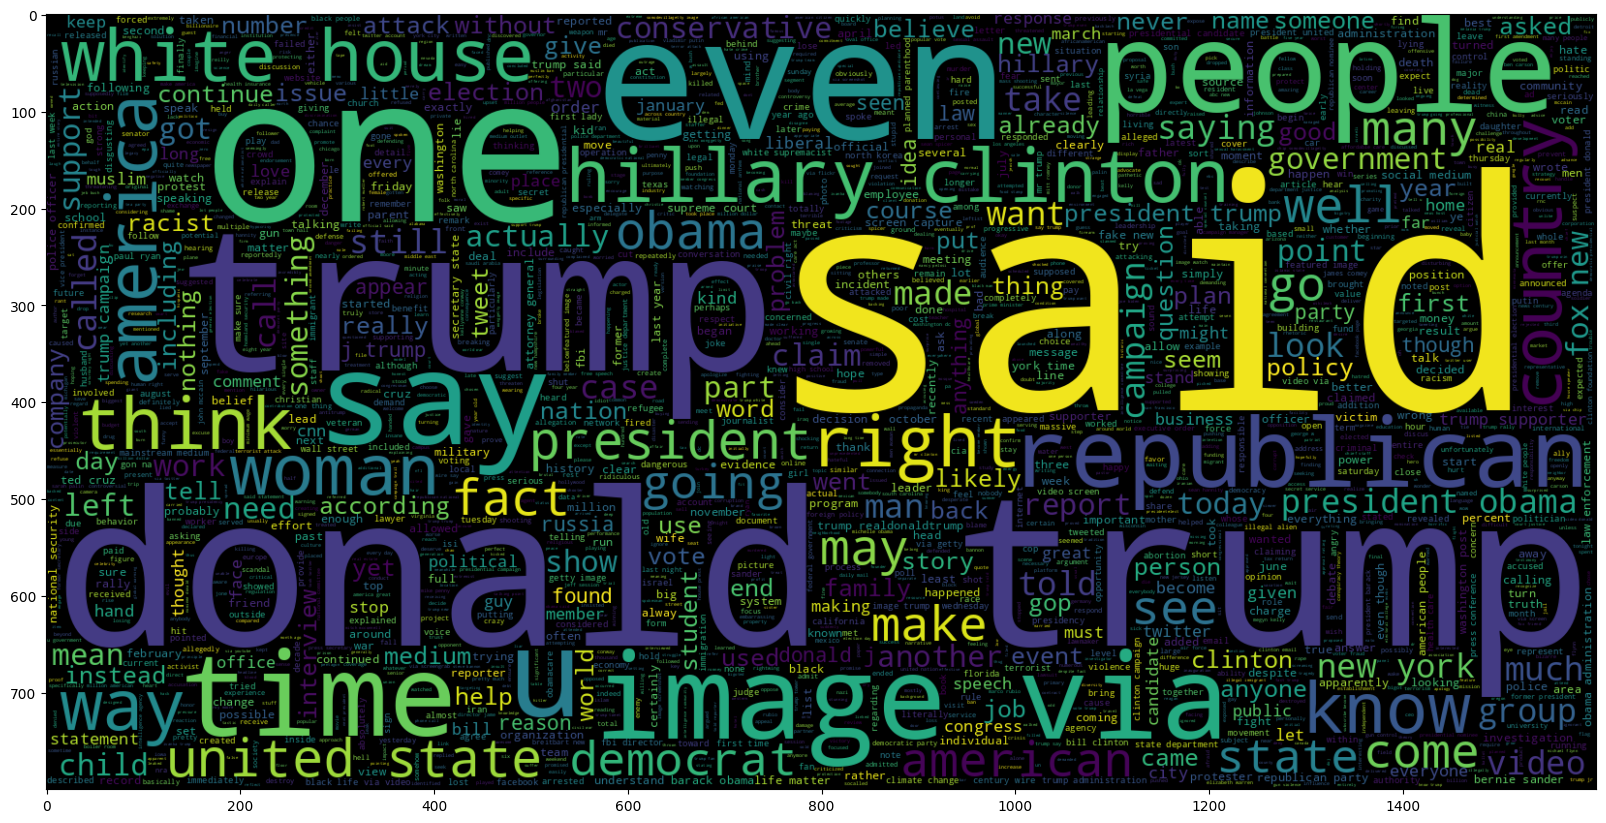

In [40]:
#plot wordcloud for fake news
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.fake_news == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

The most frequent theme on fake news are also the same as real news. We can see among the word cloud there is "image via". this indicates that most fake news outsource their image content on their articles or news page.

## Split feature `X` and target `y`

In [41]:
#split Feature and target
X= data['text']
y= data['fake_news']

## Split dataset Train, Validation, and Test

The dataset is separated into a train and validation dataset for model training, and a test dataset for model testing. Separation is done with a ratio of 80% train-validation and 20% test.

In [42]:
# Split between Train-Set, Val-Set, and Test-Set

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=20, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=20, stratify=y_train_val)

print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size : ', X_test.shape)

Train Size :  (24732,)
Val Size :  (6184,)
Test Size :  (7730,)


## Vectorization with Word2Vec

In [43]:
# Tokenize X_train
X_train_vec = [nltk.word_tokenize(text) for text in X_train]

# Tokenize X_val
X_val_vec = [nltk.word_tokenize(text) for text in X_val]

# Tokenize X_test
X_test_vec = [nltk.word_tokenize(text) for text in X_test]

In [44]:
#Dimension of vectors we are generating
EMBEDDING_DIM = 100

#Creating Word Vectors by Word2Vec Method
w2v_model = Word2Vec(sentences=X_train_vec, vector_size=EMBEDDING_DIM, window=5, min_count=1)

In [45]:
#vocab size
len(w2v_model.wv.key_to_index)

146334

In [46]:
#see a sample vector for random word, lets say indonesia 
w2v_model.wv.get_vector("indonesia")

array([-0.58110994, -0.55996037,  0.09390306,  1.4005764 , -0.77362454,
       -0.6841444 , -0.64802283, -0.85628384,  0.5509107 ,  0.6955363 ,
        0.96079636,  1.1969246 ,  1.2602262 ,  0.7745552 ,  1.446349  ,
        1.0709246 ,  0.21988426, -0.99802047,  0.5008933 , -1.2280207 ,
        1.2748684 ,  0.30287993,  1.6225137 , -0.20885052, -1.754506  ,
        0.38502777,  0.6177348 ,  0.7198242 ,  0.36440226,  0.33398634,
        1.6836632 ,  0.2555315 ,  0.06983159,  0.56952995, -0.46914417,
        1.4515632 ,  0.84853643, -0.6941535 , -1.5933646 ,  0.4898735 ,
        0.5967924 ,  1.0327847 ,  0.06715374, -0.80482256,  1.1293776 ,
        0.13669415,  0.40747038,  0.4917644 , -0.48484814, -0.39117748,
        0.5061109 , -0.48236802, -0.9382502 , -0.7255002 , -1.3944757 ,
        1.2418932 , -1.1457243 ,  0.6592099 ,  0.31526804, -0.5157384 ,
        0.02271923, -0.04534855,  0.20958926,  0.27406815, -0.135713  ,
       -0.16633579, -0.18492745,  0.39658174, -0.8358931 ,  0.29

In [47]:
w2v_model.wv.most_similar("indonesia")

[('malaysia', 0.8819434642791748),
 ('thailand', 0.8568724989891052),
 ('indonesian', 0.7809966206550598),
 ('jakarta', 0.7765994071960449),
 ('tunisia', 0.7714608907699585),
 ('ethiopia', 0.7708180546760559),
 ('nigeria', 0.7667163014411926),
 ('kuala', 0.7533413767814636),
 ('singapore', 0.7500894665718079),
 ('cameroon', 0.736457347869873)]

In [48]:
w2v_model.wv.most_similar("computer")

[('electronic', 0.8031889200210571),
 ('software', 0.7900840640068054),
 ('laptop', 0.7587124705314636),
 ('scanning', 0.7463988065719604),
 ('accessed', 0.7419753074645996),
 ('malware', 0.736578643321991),
 ('device', 0.7295802235603333),
 ('unauthorized', 0.7273728251457214),
 ('unclassified', 0.725192129611969),
 ('hacker', 0.7205413579940796)]

## Tokenization

In [49]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_vec)

X_train_vec = tokenizer.texts_to_sequences(X_train_vec)
X_val_vec = tokenizer.texts_to_sequences(X_val_vec)
X_test_vec = tokenizer.texts_to_sequences(X_test_vec)

In [50]:
X_train_vec[0][:10]

[929, 2615, 4, 2480, 25317, 60711, 239, 578, 229, 11392]

## Determining Size of Input

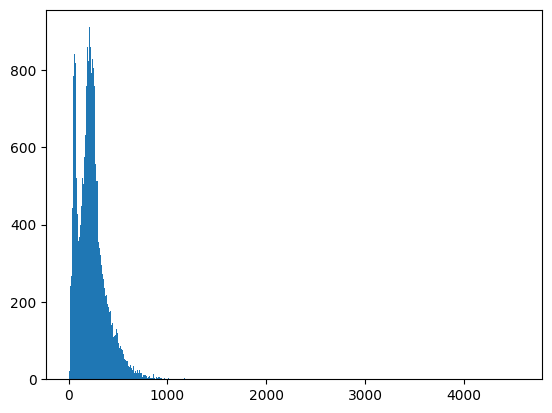

In [51]:
#histogram for number of words in news
plt.hist([len(x) for x in X_train_vec], bins=500)
plt.show()

Most news are below 700 words. We will keep all news at 700 with padding.

In [52]:
X_train_vec = pad_sequences(X_train_vec, maxlen=700)
X_val_vec = pad_sequences(X_val_vec, maxlen=700)
X_test_vec = pad_sequences(X_test_vec, maxlen=700)

## Get Embedding Matrix from Word2Vec
In Keras, there is a built-in layer called "Embedding Layer" that is used to create word embeddings or word vectors. In this case, since we have already generated word vectors using gensim's word2vec, we can load these pre-trained vectors into the Embedding Layer in Keras. By making the Embedding Layer non-trainable, the weights of the word vectors will remain fixed during the training process and will not be updated. This allows us to utilize the pre-trained word vectors in our model without modifying them further.

In [53]:
# Adding 1 because of reserved 0 index
# Embedding Layer creates one more vector for "UNKNOWN" words, or padded words (0s). This Vector is filled with zeros.
# Thus our vocab size inceeases by 1
vocab_size = len(tokenizer.word_index) + 1

In [54]:
def get_weight_matrix(model, vocab):
    # Get embedding dimension from the model
    embedding_dim = model.wv.vector_size
    
    # Initialize the weight matrix with zeros
    weight_matrix = np.zeros((len(vocab) + 1, embedding_dim))
    
    # Iterate over the vocabulary, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        if word in model.wv:
            weight_matrix[i] = model.wv.get_vector(word)
    
    return weight_matrix

In [55]:
#Getting embedding vectors from word2vec and usings it as weights of non-trainable keras embedding layer
word_index = tokenizer.word_index
embedding_vectors = get_weight_matrix(w2v_model, word_index)

---

# 6. Model Definition

## Tensorflow Pipeline

In [56]:
train_pipe = tf.data.Dataset.from_tensor_slices((X_train_vec,y_train)).batch(32).prefetch(tf.data.AUTOTUNE)
val_pipe = tf.data.Dataset.from_tensor_slices((X_val_vec,y_val)).batch(32)

## RNN Model With LSTM

In [57]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [58]:
#Defining Neural Network
model_base = Sequential()
#Non-trainable embeddidng layer
model_base.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=700, trainable=False))
#Hidden layer 1
model_base.add(LSTM(units=128, return_sequences=True))
#Hidden layer 2
model_base.add(LSTM(units=64))
#Output layer
model_base.add(Dense(1, activation='sigmoid'))
#Compile
model_base.compile(optimizer='adam', 
                   loss='binary_crossentropy', 
                   metrics=['accuracy'])
# Summary
model_base.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 700, 100)          14633500  
                                                                 
 lstm (LSTM)                 (None, 700, 128)          117248    
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 14,800,221
Trainable params: 166,721
Non-trainable params: 14,633,500
_________________________________________________________________


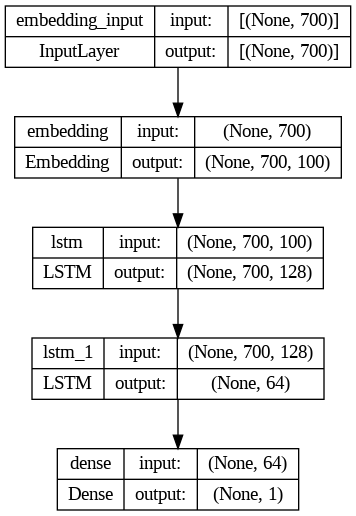

In [59]:
# Plot Layers
tf.keras.utils.plot_model(model_base, show_shapes=True)

---

# 7. Model Training

In [60]:
# define earlystopping callback
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

Callback early stopping monitors the performance of a model on a validation dataset during training and stops the training process when the model's performance on the validation set starts to deteriorate.

## Base LSTM RNN

In [61]:
# Train the Model
%%time
history_base = model_base.fit(train_pipe,
                                   epochs=20,
                                   validation_data=(val_pipe),
                                   callbacks=callback)

Epoch 1/20
773/773 [==============================] - 43s 47ms/step - loss: 0.0881 - accuracy: 0.9675 - val_loss: 0.0139 - val_accuracy: 0.9964
Epoch 2/20
773/773 [==============================] - 35s 45ms/step - loss: 0.0198 - accuracy: 0.9946 - val_loss: 0.0146 - val_accuracy: 0.9976
Epoch 3/20
773/773 [==============================] - 34s 45ms/step - loss: 0.0147 - accuracy: 0.9960 - val_loss: 0.0144 - val_accuracy: 0.9974
Epoch 4/20
773/773 [==============================] - 35s 45ms/step - loss: 0.0168 - accuracy: 0.9951 - val_loss: 0.0116 - val_accuracy: 0.9969
Epoch 5/20
773/773 [==============================] - 35s 45ms/step - loss: 0.0137 - accuracy: 0.9960 - val_loss: 0.0090 - val_accuracy: 0.9981
Epoch 6/20
773/773 [==============================] - 35s 45ms/step - loss: 0.0058 - accuracy: 0.9984 - val_loss: 0.0107 - val_accuracy: 0.9974
Epoch 7/20
773/773 [==============================] - 35s 45ms/step - loss: 0.0045 - accuracy: 0.9985 - val_loss: 0.0089 - val_accuracy:

In [62]:
# Create DataFrame

history_base_df = pd.DataFrame(history_base.history)
history_base_df.tail()

loss  accuracy  val_loss  val_accuracy
6   0.004479  0.998504  0.008924      0.998221
7   0.003444  0.998827  0.007363      0.998706
8   0.004492  0.998787  0.013822      0.996928
9   0.002723  0.999070  0.008161      0.998706
10  0.000797  0.999798  0.009760      0.998383

<Axes: >

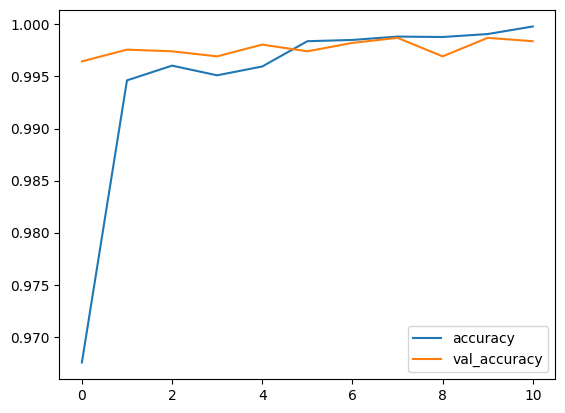

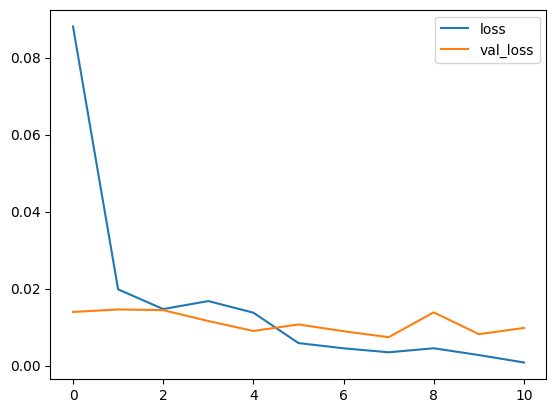

In [63]:
# Plot Training Results

history_base_df[['accuracy', 'val_accuracy']].plot()
history_base_df[['loss', 'val_loss']].plot()

The model already good fit with great accuracy (99%), but the training speed is very slow. We will try to increase training speed by reducing the hidden layer from 2 to 1 hidden layer.

## Model improvement

In [64]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In this part the RNN model will be improved by reducing hidden layer to simplify the model and potentially increase training speed.

In [65]:
# Defining Neural Network
model_improve = Sequential()
# Non-trainable embedding layer
model_improve.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, 
                            weights=[embedding_vectors], input_length=700, 
                            trainable=False))
# LSTM layer with dropout
model_improve.add(LSTM(units=128))
# Output layer
model_improve.add(Dense(1, activation='sigmoid'))
# Compile
model_improve.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

# Summary
model_improve.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 700, 100)          14633500  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 14,750,877
Trainable params: 117,377
Non-trainable params: 14,633,500
_________________________________________________________________


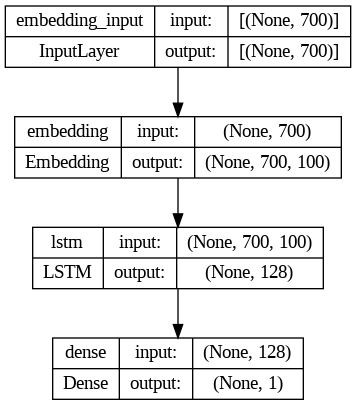

In [66]:
# Plot Layers

tf.keras.utils.plot_model(model_improve, show_shapes=True)

In [67]:
# Train the Model

%%time
history_improve = model_improve.fit(train_pipe,
                                   epochs=20,
                                   validation_data=(val_pipe),
                                   callbacks=callback)

Epoch 1/20
773/773 [==============================] - 22s 25ms/step - loss: 0.0877 - acc: 0.9673 - val_loss: 0.0151 - val_acc: 0.9968
Epoch 2/20
773/773 [==============================] - 19s 24ms/step - loss: 0.0181 - acc: 0.9952 - val_loss: 0.0139 - val_acc: 0.9971
Epoch 3/20
773/773 [==============================] - 19s 25ms/step - loss: 0.0200 - acc: 0.9939 - val_loss: 0.0156 - val_acc: 0.9961
Epoch 4/20
773/773 [==============================] - 19s 25ms/step - loss: 0.0186 - acc: 0.9937 - val_loss: 0.0088 - val_acc: 0.9979
Epoch 5/20
773/773 [==============================] - 19s 24ms/step - loss: 0.0091 - acc: 0.9971 - val_loss: 0.0121 - val_acc: 0.9973
Epoch 6/20
773/773 [==============================] - 19s 25ms/step - loss: 0.0084 - acc: 0.9975 - val_loss: 0.0079 - val_acc: 0.9984
Epoch 7/20
773/773 [==============================] - 19s 25ms/step - loss: 0.0118 - acc: 0.9964 - val_loss: 0.0121 - val_acc: 0.9966
Epoch 8/20
773/773 [==============================] - 20s 25ms

In [68]:
# Create DataFrame

history_improve_df = pd.DataFrame(history_improve.history)
history_improve_df.tail()

loss       acc  val_loss   val_acc
6   0.011794  0.996442  0.012068  0.996604
7   0.006718  0.997978  0.007191  0.998221
8   0.003118  0.999030  0.007625  0.998383
9   0.002105  0.999313  0.008473  0.998221
10  0.002460  0.999313  0.010884  0.997574

<Axes: >

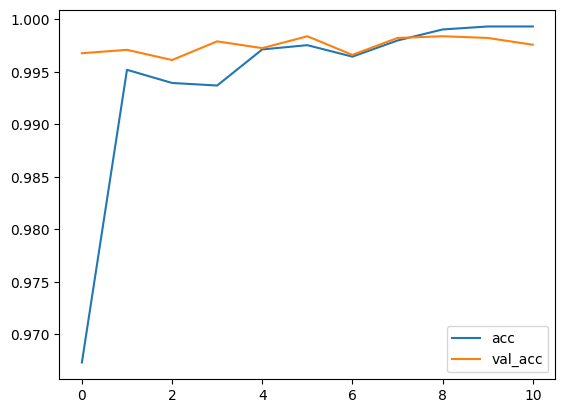

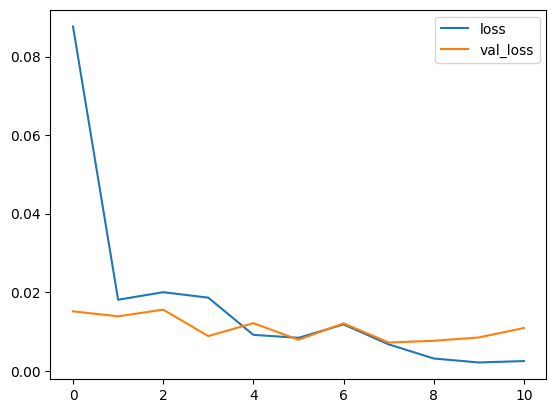

In [69]:
# Plot Training Results

history_improve_df[['acc', 'val_acc']].plot()
history_improve_df[['loss', 'val_loss']].plot()

The model is still good fit with great accuracy (99%) and it runs two times faster than the base model.

# 8. Model Evaluation

Model will be evaluated on test dataset with classification report and confusion matrix. We will be focusing on recall metrics because we want to minimize false negatives.

## Model ANN Base

In [70]:
# Model Evaluation of test-set

y_pred_base = model_base.predict(X_test_vec)
y_pred_base = np.where(y_pred_base >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_base))

242/242 [==============================] - 5s 17ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4239
           1       1.00      1.00      1.00      3491

    accuracy                           1.00      7730
   macro avg       1.00      1.00      1.00      7730
weighted avg       1.00      1.00      1.00      7730



<Axes: >

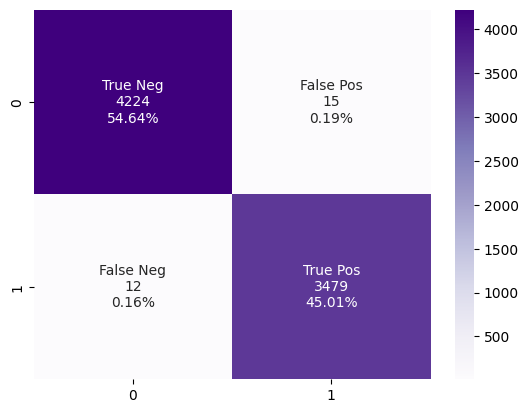

In [71]:
# confusion matrix
confusion = confusion_matrix(y_test, y_pred_base)
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [value for value in confusion.flatten()]
percentages = ['{0:.2%}'.format(value) for value in confusion.flatten()/np.sum(confusion)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion,annot = labels,cmap = 'Purples',fmt ='')

The base model has recall value of 1.00 on class 1, indicating that almost 100% of the actual class 1 samples or fake news are correctly identified. From the confusion matrix we can see that 0.16% or 12 out of 7730 of prediction are false negatives.

## Improved ANN

In [72]:
# Model Evaluation of test-set

y_pred_improve = model_improve.predict(X_test_vec)
y_pred_improve = np.where(y_pred_improve >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_improve))

242/242 [==============================] - 3s 10ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4239
           1       1.00      1.00      1.00      3491

    accuracy                           1.00      7730
   macro avg       1.00      1.00      1.00      7730
weighted avg       1.00      1.00      1.00      7730



<Axes: >

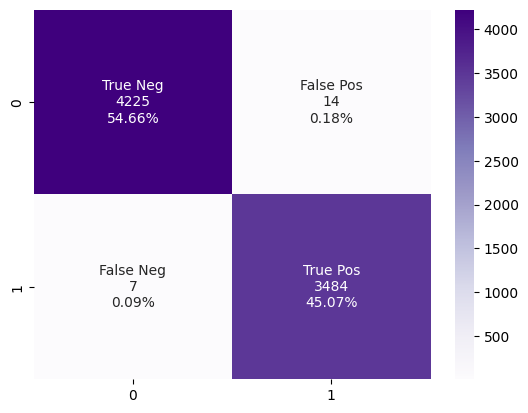

In [73]:
#confusion matrix
confusion = confusion_matrix(y_test, y_pred_improve)
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [value for value in confusion.flatten()]
percentages = ['{0:.2%}'.format(value) for value in confusion.flatten()/np.sum(confusion)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion,annot = labels,cmap = 'Purples',fmt ='')

The improved sequential model has recall value of 1.00 on class 1, indicating that almost 100% of the actual class 1 samples or fake news are correctly identified. From the confusion matrix we can see that 0.09% of prediction are false negatives. This means the improved model performed better than the previous model.

## Model Weakness

In [74]:
# create DF Act vs Pred
act_pred_imp = pd.DataFrame({
            'actual' : y_test,
            'prediction' : np.ndarray.flatten(y_pred_improve)
})
df_act_pred_imp = pd.concat([pd.DataFrame(X_test), act_pred_imp],axis=1)

In [75]:
# split FP dan FN
act_pred_imp_FP = df_act_pred_imp[(df_act_pred_imp['actual']==0) &(df_act_pred_imp['prediction']!=0)]
act_pred_imp_FN = df_act_pred_imp[(df_act_pred_imp['actual']!=0) &(df_act_pred_imp['prediction']==0)]

### Weakness words in False positive

In [76]:
# Concatenate all the text data into a single string
all_text = ' '.join(act_pred_imp_FP['text'].values)

# Tokenize the text into individual words
tokens = word_tokenize(all_text)

# Count the frequency of each word
word_freq = FreqDist(tokens)

# Get the top 20 most frequent words
most_common_words = word_freq.most_common(20)

# Print the top 20 most frequent words
for word, freq in most_common_words:
    print(word, freq)

said 49
u 44
trump 38
tax 28
republican 24
would 22
state 20
bill 20
north 18
president 17
year 17
million 17
campaign 16
house 15
former 14
justice 13
white 13
nomination 13
one 12
party 12


### Weakness words in False Negative

In [77]:
# Concatenate all the text data into a single string
all_text = ' '.join(act_pred_imp_FN['text'].values)

# Tokenize the text into individual words
tokens = word_tokenize(all_text)

# Count the frequency of each word
word_freq = FreqDist(tokens)

# Get the top 20 most frequent words
most_common_words = word_freq.most_common(20)

# Print the top 20 most frequent words
for word, freq in most_common_words:
    print(word, freq)

president 55
would 45
trump 43
said 39
u 25
emp 24
fbi 23
nuclear 22
could 18
attack 18
house 17
investigation 17
director 16
way 16
general 15
trade 15
also 14
conversation 14
power 13
week 13


Comparing the top words from false positive and false negative data, we can observe the following insights:

- Overlapping Words: Both false positive and false negative data contain common words such as "said," "Trump," and "president." These words indicate the challenges in accurately classifying news articles related to political figures and statements.

- Misleading Context: False positive data includes words like "tax," "Republican," and "bill," which may indicate that certain political or legislative topics were incorrectly classified as fake news. On the other hand, false negative data includes words like "FBI," "nuclear," and "attack," which suggests that articles discussing sensitive topics were misclassified as real news.

- Speculative Language: False positive data includes words like "would," "state," and "year," which might indicate speculative or conditional statements that resemble fake news. False negative data includes words like "could" and "also," which suggest the presence of uncertain or speculative information.

These insights highlight the challenges of accurately detecting fake news, especially in the context of political content and sensitive topics. The misclassifications can occur due to the use of similar words, misleading context, or speculative language. To improve the accuracy of the model, it is important to incorporate additional features and context to better differentiate between genuine and fake news articles.

# 9. Model Saving

In [78]:
# Freeze Model
model_improve.trainable = False

In [79]:
model_improve.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 700, 100)          14633500  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 14,750,877
Trainable params: 0
Non-trainable params: 14,750,877
_________________________________________________________________


In [80]:
# Save RNN Model
model_improve.save('model_improve.h5')

# 10. Model Inference

Model inference was performed on the notebook [model_inference.ipynb]('h8dsft_P2M1_ali_aufa_inference.ipynb'). The model used is our improved RNN model because the model evaluation results are better and the training process are faster.

After doing the inference model, it can be seen that the model can make predictions. We will then deploy the model on huggingface which can be seen here: https://huggingface.co/spaces/aliaufa/Fake-News-Detection

# 11. Conclusion

In conclusion, we have developed and evaluated a fake news detection model to address the challenge of identifying misleading or false information on the Chirper social media platform. Through exploratory data analysis (EDA) and model evaluation, we gained valuable insights into the characteristics of both real and fake news articles.

From the EDA, we observed that fake news articles tend to have a higher average number of sentences but a lower average number of words compared to real news. This suggests that fake news may utilize shorter sentences and potentially employ more sensational or attention-grabbing language to capture readers' attention. Additionally, the word cloud analysis revealed that the most frequent words in fake news articles were related to political themes, while real news articles displayed a broader range of topics, including politics, world news, and business.

Regarding the model's performance, we achieved an accuracy of around 100% on the test dataset. However, during the analysis of misclassified samples, we found that certain articles discussing sensitive topics or containing speculative language were prone to misclassification.

Insights gained from comparing the top words in false positive and false negative samples further emphasized the challenges in accurately detecting fake news. Overlapping words like "said," "Trump," and "president" indicated the difficulty in classifying political-related content. Additionally, words related to specific topics such as "tax," "Republican," "FBI," and "nuclear" showed instances where genuine articles were misclassified as fake news or vice versa due to the context and language used.

While the model already has great accuracy, we can still enhance the model's performance and mitigate misclassifications. Further improvements can be made by adding more news data that are not politics, incorporating additional features, considering the context, and refining the model architecture. It is crucial to continually update and adapt the model to evolving trends and techniques used in spreading fake news.

By addressing the challenge of fake news detection, we aim to safeguard user trust, promote informed discussions, and enhance the overall user experience on the Chirper platform. Our findings and insights provide a foundation for future research and development in combating fake news and fostering a reliable and trustworthy information ecosystem.